# 如何学习使用matplotlib

可视化可以帮助人们对数据有更直观的认识，更容易获取有用的信息。

在python中，最基本的绘图库就是matplotlib了。安装matplotlib的方式：

```Shell
conda install -c conda-forge matplotlib
```

作为一个拥有很多api的库，如果对其基本思路没有认知，那每次使用的时候都要大量地查询官方文档，费时费力。

## 基本构图

对matplotlib，首先要了解其绘图的基本方式。即matplotlib是采用什么样的基本方式进行构图。

matplotlib是一个二维绘图库，其主要构件有两大部分：

- 构图区Figure：Figure是一个顶层容器，包含所有的figures和Axes。一个Figure的基本构成如下图所示，包括title/grid/line/markers/legend/Axes

![figure](figure-matplotlib.png)

- 坐标轴Axes：可以有多个坐标系（这样可以一次绘制多个图），每个坐标系都有x轴和y轴，每个轴都有相关的title/tick（刻度）/label。

![axes](axes-in-matplotlib.png)

## 绘图范式

安装matplotlib库很简单，通过pip或conda都很容易，这里不再赘述，导入方式如下代码所示。


In [2]:
import matplotlib.pyplot as plt
# 在jupyter中可以使用以下语句很容易地显示图形
%matplotlib inline
# 如果是python脚本环境下，则需要调用以下语句，当然在jupyter下也可以使用该语句
plt.show()

使用matplotlib绘图有两大类基本的方法。

### Functional Approach

此类方法直接使用基本的命令即可，遵循着很简洁的步骤：

1. 在matplotlib中最常用的就是pyplot模块。首先导入该模块；
2. 导入可视化对象。通常使用numpy或pandas库的读取数据功能来帮助实现，比如pd.readcsv()；
3. 从数据中提取需要展示的部分。这部分利用numpy或pandas库的函数可以较好实现；
4. 利用ply.plot()绘制图形；
5. 利用plt.xlabel、plt.ylabel和plt.xticks、plt.yticks等说明坐标轴的信息；
6. 利用plt.legend()、plt.title()等说明图的信息；
7. 最后使用plt.show()（jupyter下使用%matplotlib inline即可）将图形展示出来。

比如：


Text(0.5, 1.0, 'First Plot')

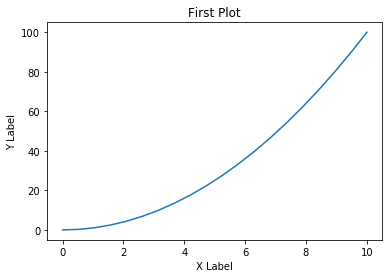

In [4]:
import numpy as np
x=np.linspace(0,10,20)
y=x**2
plt.plot(x,y)
plt.xlabel('X Label')
plt.ylabel('Y Label')
plt.title('First Plot')

如果需要多个Axes同时在一个Figure里。则可以使用subplot()方法来实现，

该方法包括三个主要参数：

- nrows：Figure的行数;
- ncols：Figure的列数;
- plot_number：在哪一个子Axe下面画图。

如下代码所示。


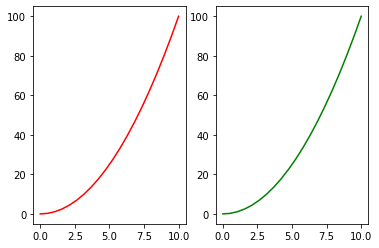

In [6]:
plt.subplot(1,2,1)
# 可以设置图形颜色
plt.plot(x,y,'red')

plt.subplot(1,2,2)
plt.plot(x,y,'green')

### Object oriented Interface

这一种是更好的绘图方式。其基本思路是创建Figure对象，并对其使用各类方法。

用此法绘图的一般思路前面导入数据部分和前述一致，不再赘述，其他部分:

1. 创建Figure对象；
2. 增加坐标轴：add_axes有4个参数，对应axes被放置的位置（左（到左侧距离），底（到底侧距离），宽，高），取值范围[0,1]；
3. 使用axes绘图并配置坐标与图。

代码如下所示。


Text(0.5, 1.0, 'Second Plot')

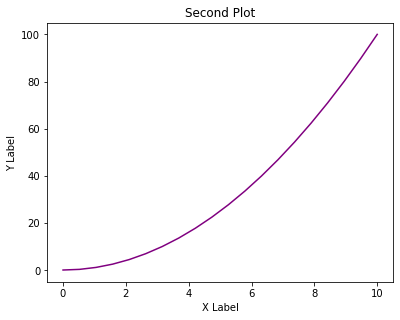

In [7]:
fig=plt.figure()
ax=fig.add_axes([0.1,0.2,0.8,0.9])
ax.plot(x,y,'purple')
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_title('Second Plot')

和直接绘图方式一样，在面向对象的方法中也可以一次绘制多个图，这种方式更加灵活


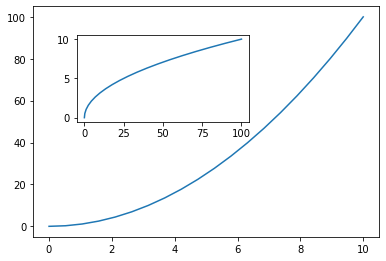

In [8]:
fig=plt.figure()
axes1=fig.add_axes([0.1,0.1,0.8,0.8])
axes2=fig.add_axes([0.2,0.5,0.4,0.3])
axes1.plot(x,y)
axes2.plot(y,x)

也可以使用subplot画图。但是不再是subplot()方法，而是subplots()方法。其只有两个方法，先绘制canvas。绘图的工作交给axes的函数来完成。

代码如下所示


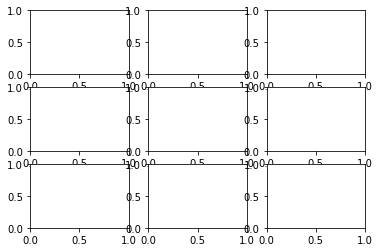

In [9]:
# 空canvas
fig, axes=plt.subplots(3,3)

如上图所示，坐标轴之间是有重叠的，不美观，可以使用tight_layout语句进行修正。


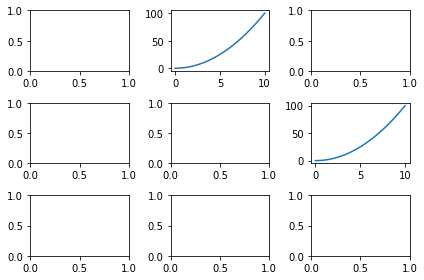

In [10]:
fig, ax=plt.subplots(3,3)
plt.tight_layout()
ax[0,1].plot(x,y)
ax[1,2].plot(x,y)

## 绘图细节

图形的定制是使用matplotlib时最大的问题，这里简单分析其基本的定制思路。

### Figure size, aspect ratio, DPI

使用figsize、dpi等参数可以对图形进行配置。figsize是图形宽和高（单位是英寸）组成的元组。dpi（dots-per-inch）是像素。


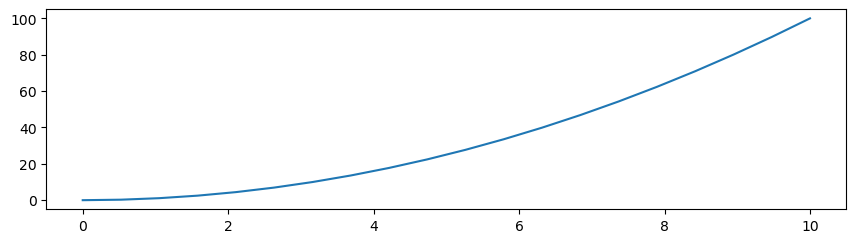

In [11]:
fig=plt.figure(figsize=(8,2),dpi=100)
ax=fig.add_axes([0,0,1,1])
ax.plot(x,y)

使用subplots：


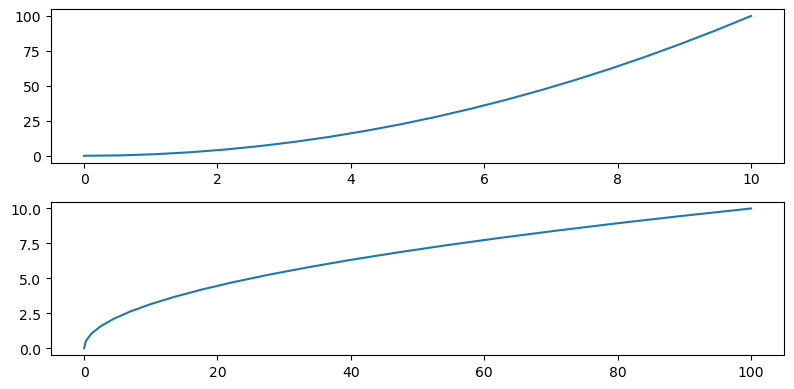

In [12]:
fig,ax=plt.subplots(nrows=2,ncols=1,figsize=(8,4),dpi=100)
ax[0].plot(x,y)
ax[1].plot(y,x)
plt.tight_layout()

### 图形读写

图像可以保存为各种类型的文件，比如png/svg/pdf等等。


In [18]:
fig.savefig('my_figure.png')

读取图片并显示的方式：


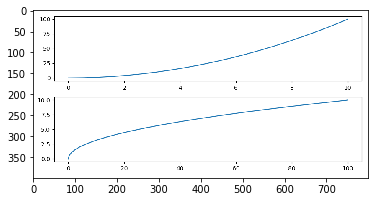

In [19]:
import matplotlib.image as mpimg
plt.imshow(mpimg.imread('my_figure.png'))

### 图例

利用图例可以很很容易区别绘制的图形。


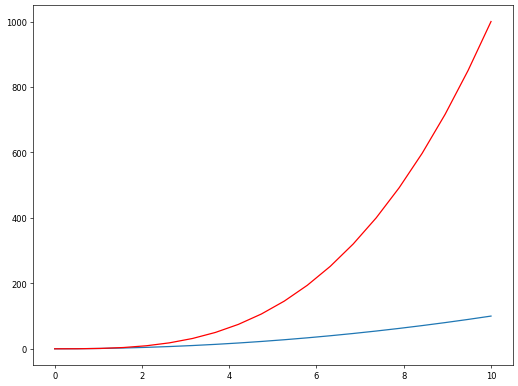

In [20]:
fig=plt.figure(figsize=(8,6),dpi=60)
ax=fig.add_axes([0,0,1,1])
ax.plot(x,x**2)
ax.plot(x,x**3,'red')

如上图所示，很难区分出两条线的实际数学意义。而使用下列代码即可。


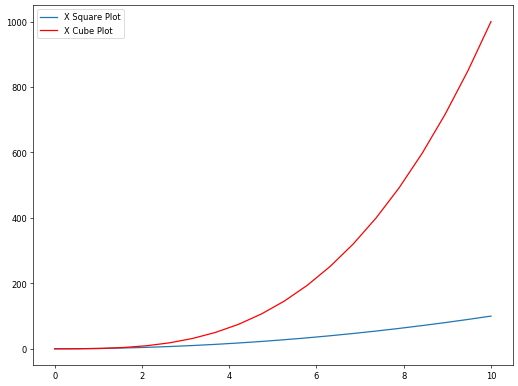

In [24]:
fig=plt.figure(figsize=(8,6),dpi=60)
ax=fig.add_axes([0,0,1,1])
ax.plot(x,x**2,label='X Square Plot')
ax.plot(x,x**3,'red',label='X Cube Plot')

ax.legend()

### Plot Appearance

关于图形的外观，包括marker的形式，线型等都是可以改变的。具体可查阅[官方文档](https://matplotlib.org/api/markers_api.html)，
[官方文档](https://matplotlib.org/2.0.1/api/lines_api.html)。这里简单展示一些示例。


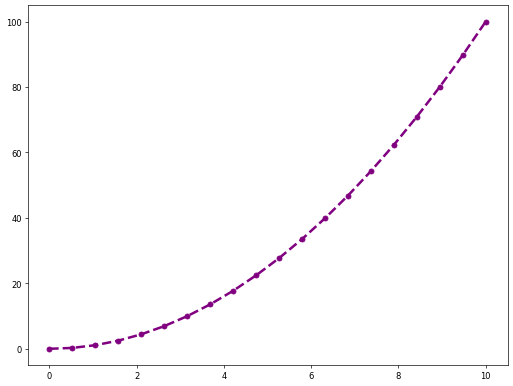

In [13]:
fig=plt.figure(figsize=(8,6),dpi=60)
ax=fig.add_axes([0,0,1,1])

ax.plot(x,y,color='purple',linewidth=3,linestyle='--',marker='o')

### Plot range

通过set_xlim和set_ylim可以限制图形显示的范围。


(0, 5)

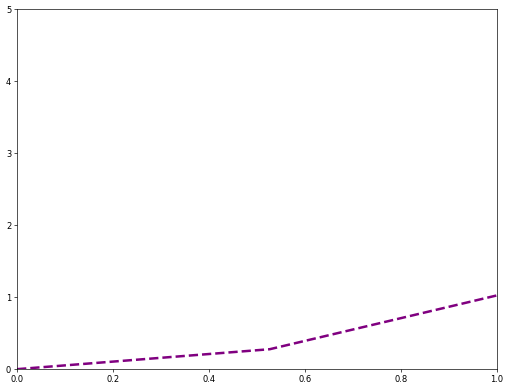

In [14]:
fig=plt.figure(figsize=(8,6),dpi=60)
ax=fig.add_axes([0,0,1,1])

ax.plot(x,y,color='purple',lw=3, ls='--')

ax.set_xlim([0,1])
ax.set_ylim([0,5])

## 绘图类型

了解基本构图法之后，再简单介绍各类图形。

### 直方图(Histogram)

一个Histogram把数据分为若干类，然后每一类里的数据进行计数。当需要对变量进行计数时，使用这种图。


(array([ 96., 128., 107., 111., 106.,  96.,  82.,  87.,  79., 108.]),
 array([0.00155818, 0.10123581, 0.20091344, 0.30059107, 0.4002687 ,
        0.49994633, 0.59962396, 0.69930158, 0.79897921, 0.89865684,
        0.99833447]),
 <a list of 10 Patch objects>)

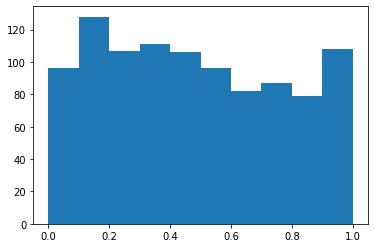

In [27]:
x=np.random.rand(1000)
n,bins,patches=plt.hist(x)

直方图返回对象包括：每个bin的频次，每个bin代表的范围的中值，代表每个bar的矩形的Patch对象。

# TODO （未完待续）

### 饼状图（Pie Chart）

### 折线图（Line Plot）

### 箱线图（Boxplot and Violinplot）

### Stack Plot and Stem Plot

### Bar Plot

### 散点图（Scatter Plot）

## 参考
1. <https://towardsdatascience.com/data-visualization-using-matplotlib-16f1aae5ce70>
2. <https://heartbeat.fritz.ai/introduction-to-matplotlib-data-visualization-in-python-d9143287ae39>


